# Mc Donalds Case Study

### Step 1 : Deciding (not) to Segment


* McDonald's can choose to either adopt a mass marketing approach, treating the entire market as homogeneous, or embrace market segmentation and differentiated marketing to capitalize on the systematic heterogeneity among consumers.

### Step 2 : Specifying the Ideal Target Segment

* In order to select an attractive market segment, McDonald's management must consider several key factors. The target segment should be homogeneous, meaning its members share a common characteristic. They should also be distinct from members of other segments, large enough to justify customized marketing efforts, and open to eating at fast food restaurants like McDonald's. Additionally, the segment must be identifiable and reachable through communication and distribution channels.

* While a segment with a positive perception of McDonald's, frequent dining out habits, and a liking for fast food seems obvious, McDonald's management may also seek to target segments that currently have low affinity for the brand. They may aim to understand and modify the perceptions responsible for this lack of fondness.

* Given the limited data available in the case study, the attractiveness criteria used for target segment selection are liking McDonald's and frequently eating at McDonald's. These criteria play a crucial role in Step 8 of the market segmentation process.

###  Exploring Data


In [1]:
!pip install scikit-learn-extra



[notice] A new release of pip is available: 23.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [59]:
#importing libraries 
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans
from sklearn.utils import check_random_state
from sklearn.metrics import adjusted_rand_score
from sklearn_extra.cluster import KMedoids



In [60]:
#loading dataset
df = pd.read_csv("mcdonalds.csv")
#checking first 5 rows
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [61]:
#detailed informaiton of the dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


In [62]:
#dimension of the dataframe
df.shape

(1453, 15)

In [63]:
# Extract the first eleven columns containing the segmentation variables
MD_x = np.array(df.iloc[:,0:11])
# Convert "YES" entries to 1 and "NO" entries to 0
MD_x = (MD_x =="Yes").astype(int)
#checking the average value of each transformed segmentation variable
segment_means = np.round(np.mean(MD_x,axis=0),2)
segment_means

array([0.55, 0.91, 0.09, 0.87, 0.53, 0.9 , 0.6 , 0.64, 0.36, 0.2 , 0.24])

##### The average values of the transformed binary numeric segmentation variables indicate that about half of the respondents (55%) perceive McDonald’s as YUMMY, 91% believe that eating at McDonald’s is CONVENIENT, but only 9% think that McDonald’s food is SPICY.

In [77]:
df['yummy'] = df['yummy'].replace(['Yes','No'],[1,0])
df['convenient'] = df['convenient'].replace(['Yes','No'],[1,0])
df['spicy'] = df['spicy'].replace(['Yes','No'],[1,0])
df['fattening'] = df['fattening'].replace(['Yes','No'],[1,0])
df['greasy'] = df['greasy'].replace(['Yes','No'],[1,0])
df['fast'] = df['fast'].replace(['Yes','No'],[1,0])
df['cheap'] = df['cheap'].replace(['Yes','No'],[1,0])
df['tasty'] = df['tasty'].replace(['Yes','No'],[1,0])
df['expensive'] = df['expensive'].replace(['Yes','No'],[1,0])
df['healthy'] = df['healthy'].replace(['Yes','No'],[1,0])
df['disgusting'] = df['disgusting'].replace(['Yes','No'],[1,0])
df['Gender'] = df['Gender'].replace(['Male','Female'],[1,0])
df['VisitFrequency'] = df['VisitFrequency'].replace(['Never','Once a year','Every three months','Once a month','Once a week','More than once a week'],[0,1,2,3,4,5])
df['Like'] = df['Like'].replace(['I hate it!-5','-4','-3','-2','-1','0','+1','+2','+3','+4','I love it!+5'],[-5,-4,-3,-2,-1,0,1,2,3,4,5])


In [82]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
yummy,1453.0,0.552650,0.497391,0.0,0.0,1.0,1.0,1.0
convenient,1453.0,0.907777,0.289440,0.0,1.0,1.0,1.0,1.0
spicy,1453.0,0.093599,0.291371,0.0,0.0,0.0,0.0,1.0
fattening,1453.0,0.867171,0.339506,0.0,1.0,1.0,1.0,1.0
greasy,1453.0,0.526497,0.499469,0.0,0.0,1.0,1.0,1.0
fast,1453.0,0.900206,0.299828,0.0,1.0,1.0,1.0,1.0
cheap,1453.0,0.598761,0.490318,0.0,0.0,1.0,1.0,1.0
tasty,1453.0,0.644184,0.478925,0.0,0.0,1.0,1.0,1.0
expensive,1453.0,0.357880,0.479542,0.0,0.0,0.0,1.0,1.0
healthy,1453.0,0.198899,0.399309,0.0,0.0,0.0,0.0,1.0


### Observations
 * Mean age of the customers is 45
 * Min Age is 18 and Max is 71

### Data Processing

In [89]:
category = []
for i in df.columns:
    if df[i].dtype=='int64':
    	category.append(i)


for i in category:
	print('Distribution of',i)
	print(df[i].value_counts())
	print('-'*60)

Distribution of yummy
1    803
0    650
Name: yummy, dtype: int64
------------------------------------------------------------
Distribution of convenient
1    1319
0     134
Name: convenient, dtype: int64
------------------------------------------------------------
Distribution of spicy
0    1317
1     136
Name: spicy, dtype: int64
------------------------------------------------------------
Distribution of fattening
1    1260
0     193
Name: fattening, dtype: int64
------------------------------------------------------------
Distribution of greasy
1    765
0    688
Name: greasy, dtype: int64
------------------------------------------------------------
Distribution of fast
1    1308
0     145
Name: fast, dtype: int64
------------------------------------------------------------
Distribution of cheap
1    870
0    583
Name: cheap, dtype: int64
------------------------------------------------------------
Distribution of tasty
1    936
0    517
Name: tasty, dtype: int64
-------------------

### Observations
* Majority of cutomers are Female 
* Most of customers found service fast and cheap
* 60% customers found the food yummy
* Majority of the customers visits once a month 
* Approx 90 percent customers doesnt found food convinent and spicy
* +3 is given by most of the customers

### Data Visualisation

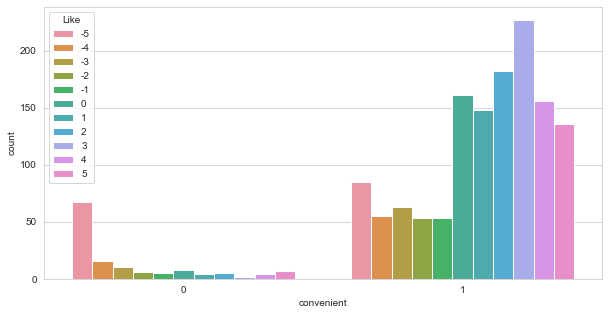

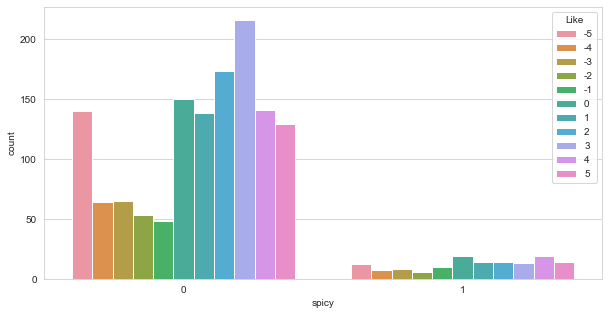

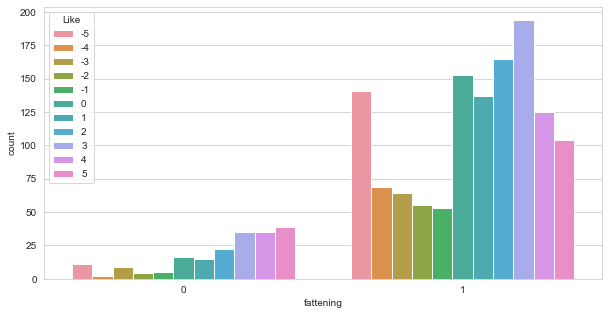

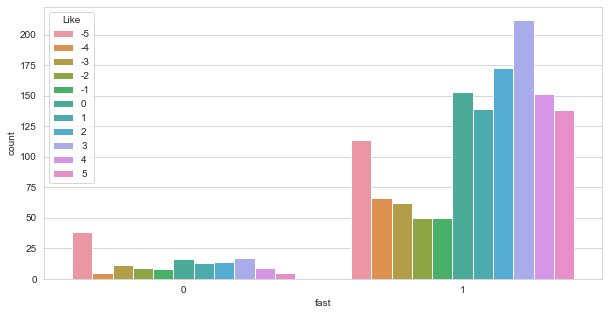

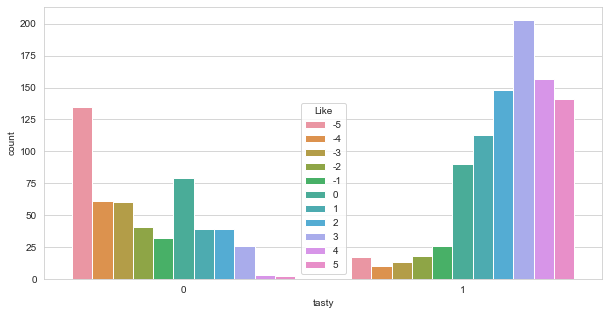

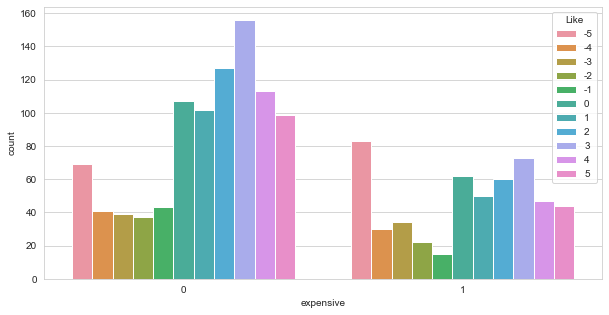

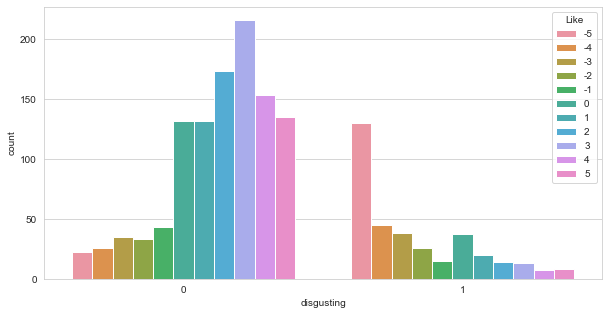

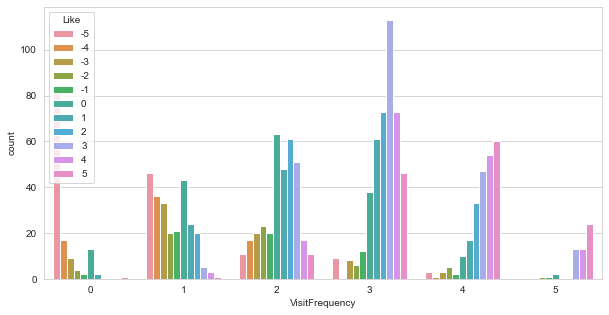

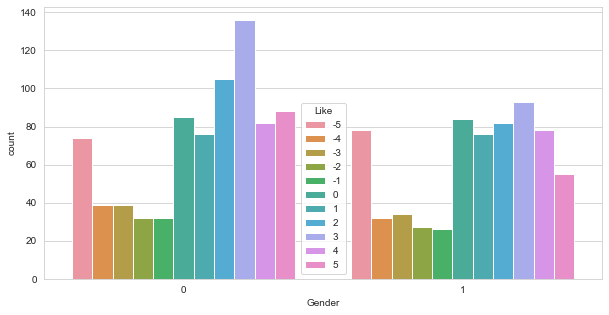

In [90]:
sns.set_style('whitegrid')
for i in df.drop(['Like','yummy','cheap','healthy','greasy','Age'],axis=1).columns:
  plt.figure(figsize=(10,5))
  sns.countplot(x=df[i],hue=df['Like'])
  plt.show()

### Observations
* Those who never visited the store have given worst rating
* Customers who visited once in a month majority times rated +3
* Customers visiting more than once a week more likely to rate I love it!+5
* Female customers are more likley to rate +3 where as males ratings are almost equally distributed

In [74]:
MD_x_df= pd.DataFrame(data=MD_x,columns=df.columns[:-4])

In [75]:
MD_x_df


,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,0,1,0,1,0,1,1,0,1,0,0
1,1,1,0,1,1,1,1,1,1,0,0
2,0,1,1,1,1,1,0,1,1,1,0
3,1,1,0,1,1,1,1,1,0,0,1
4,0,1,0,1,1,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1
1449,1,1,0,1,0,0,1,1,0,1,0
1450,1,1,0,1,0,1,0,1,1,0,0
1451,1,1,0,0,0,1,1,1,0,1,0


<AxesSubplot:>

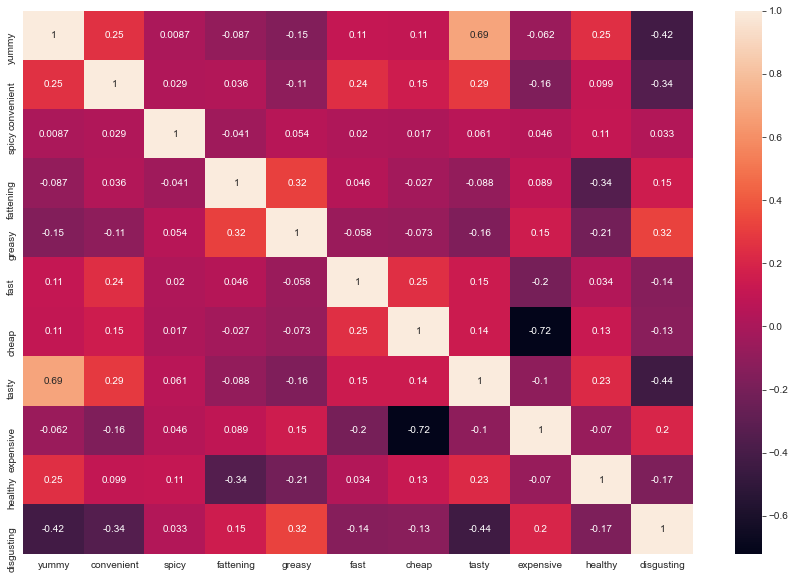

In [91]:
plt.figure(figsize=(15,10))
sns.heatmap(MD_x_df.corr(),annot=True)

### Observations
* yummy is correlated with like and tasty , expensive with cheap,  like is correlated with visitfrequency

#### Extract Segments

In [92]:
# Perform PCA on the transformed segmentation variables
MD_pca = PCA()
MD_pca.fit(MD_x)

# Print the summary of PCA results
print("Importance of components:")
print("Standard deviation", np.round(MD_pca.explained_variance_, 4))
print("Proportion of Variance", np.round(MD_pca.explained_variance_ratio_, 4))
print("Cumulative Proportion", np.round(np.cumsum(MD_pca.explained_variance_ratio_), 4))

# Print the factor loadings
print("Factor Loadings:")
print(pd.DataFrame(MD_pca.components_, columns=df.columns[:11]))






Importance of components:
Standard deviation [0.5731 0.369  0.2546 0.159  0.1138 0.0963 0.0839 0.0757 0.0704 0.0619
 0.0561]
Proportion of Variance [0.2994 0.1928 0.133  0.0831 0.0595 0.0503 0.0438 0.0395 0.0368 0.0324
 0.0293]
Cumulative Proportion [0.2994 0.4922 0.6253 0.7084 0.7679 0.8182 0.862  0.9016 0.9383 0.9707
 1.    ]
Factor Loadings:
       yummy  convenient     spicy  fattening    greasy      fast     cheap  \
0  -0.476933   -0.155332 -0.006356   0.116232  0.304443 -0.108493 -0.337186   
1   0.363790    0.016414  0.018809  -0.034094 -0.063839 -0.086972 -0.610633   
2  -0.304444   -0.062515 -0.037019  -0.322359 -0.802373 -0.064642 -0.149310   
3   0.055162   -0.142425  0.197619  -0.354139  0.253960 -0.097363  0.118958   
4  -0.307535    0.277608  0.070620  -0.073405  0.361399  0.107930 -0.128973   
5   0.170738   -0.347830 -0.355087  -0.406515  0.209347 -0.594632 -0.103241   
6  -0.280519   -0.059738  0.707637  -0.385943  0.036170 -0.086846 -0.040449   
7   0.013041   -0.113

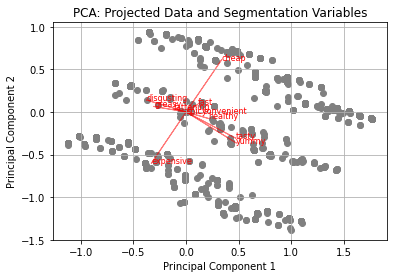

In [8]:
# Perform PCA
MD_pca = np.linalg.svd(MD_x - np.mean(MD_x, axis=0))[2][:2]

# Project data onto the first two principal components
projected_data = np.dot(MD_x, MD_pca.T)

# Plot the projected data points
plt.scatter(projected_data[:, 0], projected_data[:, 1], color='grey')

# Plot arrows representing the original segmentation variables
segment_vars = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy',
                'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting']
for i, seg_var in enumerate(segment_vars):
    plt.arrow(0, 0, MD_pca[0, i], MD_pca[1, i], color='red', alpha=0.5)
    plt.text(MD_pca[0, i], MD_pca[1, i], seg_var, color='red', fontsize=8)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA: Projected Data and Segmentation Variables')
plt.grid(True)
plt.show()


In [9]:
!pip install --upgrade scikit-learn threadpoolctl



[notice] A new release of pip is available: 23.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [94]:
#Using K-Means
from sklearn.cluster import KMeans

# Set the random seed
np.random.seed(1234)

# Perform k-means clustering
k_values = range(2, 9)
inertias = []
labels = []
best_k = -1
best_inertia = np.inf

for k in k_values:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=1234)
    kmeans.fit(MD_x)
    inertias.append(kmeans.inertia_)
    labels.append(kmeans.labels_)
    
    if kmeans.inertia_ < best_inertia:
        best_k = k
        best_inertia = kmeans.inertia_

best_labels = labels[best_k - 2]  # Select the labels for the best k value





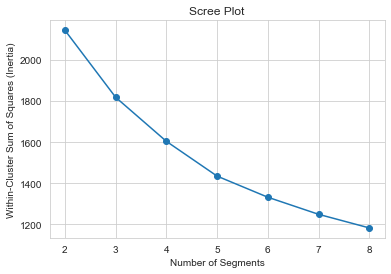

In [95]:
# Calculate the within-cluster sum of squares (inertia) for each number of segments
inertias = [KMeans(n_clusters=k, n_init=10, random_state=1234).fit(MD_x).inertia_ for k in range(2, 9)]

# Plot the scree plot
plt.plot(range(2, 9), inertias, marker='o')
plt.xlabel('Number of Segments')
plt.ylabel('Within-Cluster Sum of Squares (Inertia)')
plt.title('Scree Plot')
plt.show()


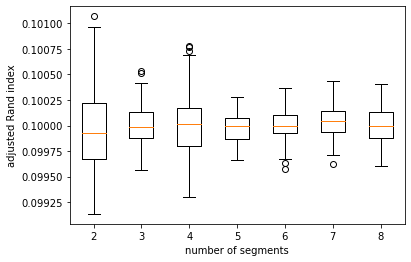

In [15]:

np.random.seed(1234)

# Define the range of number of segments
num_segments = np.arange(2, 9)

# Perform bootstrapped cluster stability analysis
n_rep = 10
n_boot = 100
stability_scores = []

for n_clusters in num_segments:
    segment_stability = []
    for _ in range(n_boot):
        bootstrap_samples = []
        for _ in range(n_rep):
            bootstrap_sample = MD_x[np.random.choice(len(MD_x), size=len(MD_x), replace=True)]
            bootstrap_samples.append(bootstrap_sample)
        
        cluster_solutions = []
        for bootstrap_sample in bootstrap_samples:
            kmeans = KMeans(n_init=10,n_clusters=n_clusters)
            clusters = kmeans.fit_predict(bootstrap_sample)
            cluster_solutions.append(clusters)
        
        agreement_matrix = np.zeros((n_rep, n_rep))
        for i in range(n_rep):
            for j in range(n_rep):
                agreement_matrix[i, j] = adjusted_rand_score(cluster_solutions[i], cluster_solutions[j])
        
        segment_stability.append(np.mean(agreement_matrix))
    
    stability_scores.append(segment_stability)

# Plot the stability boxplot
plt.boxplot(stability_scores)
plt.xlabel("number of segments")
plt.ylabel("adjusted Rand index")
plt.xticks(np.arange(1, len(num_segments) + 1), num_segments)
plt.show()


In [96]:
from sklearn.decomposition import LatentDirichletAllocation

# Set the seed and define the data
np.random.seed(1234)

# Perform the latent class analysis
results = []
for k in range(2, 9):
    lda = LatentDirichletAllocation(n_components=k, random_state=1234)
    lda.fit(MD_x)
    results.append({
        'k': k,
        'log_likelihood': lda.score(MD_x),
        'perplexity': lda.perplexity(MD_x)
    })

results_df = pd.DataFrame(results)
print(results_df)


   k  log_likelihood  perplexity
0  2   -19999.656374   10.346843
1  3   -20842.733955   11.417912
2  4   -21354.573491   12.121547
3  5   -21689.827010   12.605766
4  6   -21847.666788   12.840391
5  7   -22148.271614   13.299377
6  8   -22302.204098   13.540729


##### The output suggests that the LCA model with 2 or 3 latent classes may provide a reasonable fit to the binary data, as they have relatively higher log-likelihood and lower perplexity values compared to models with a higher number of latent classes. 

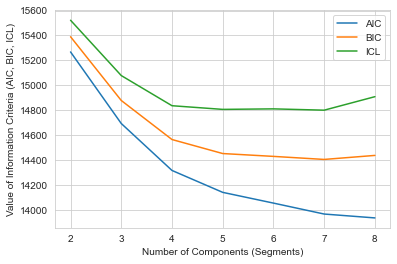

In [97]:
import matplotlib.pyplot as plt
import pandas as pd

# Information criteria values (AIC, BIC, ICL)
info_criteria = {
	 'k': [2, 3, 4, 5, 6, 7, 8],
 	  'AIC': [15267.70,14693.07,14316.26,14140.41,14054.22,13966.38,13935.28],
	 'BIC': [15389.70,14877.92,14564.52,14452.01,14429.20,14404.73,14437.01],
	  'ICL': [15522.1,15077.96,14835.95,14806.54,14810.65,14800.16,14908.52]
}

# Convert information criteria to a DataFrame
df_info_criteria = pd.DataFrame(info_criteria)

# Plotting
plt.plot(df_info_criteria['k'], df_info_criteria['AIC'], label='AIC')
plt.plot(df_info_criteria['k'], df_info_criteria['BIC'], label='BIC')
plt.plot(df_info_criteria['k'], df_info_criteria['ICL'], label='ICL')

# Customize the plot
plt.xlabel('Number of Components (Segments)')
plt.ylabel('Value of Information Criteria (AIC, BIC, ICL)')
plt.legend()

# Show the plot
plt.show()


In [98]:
# Initialize the mixture model using the segment memberships of the k-means solution
from sklearn.mixture import GaussianMixture

MD_k4_labels = labels[3]  # Select the labels for the k-means solution with 4 clusters

gmm = GaussianMixture(n_components=4, init_params='kmeans', random_state=1234)
gmm.fit(MD_x)

MD_m4a_labels = gmm.predict(MD_x)

# Create a contingency table comparing the k-means and mixture model segment memberships
contingency_table = pd.crosstab(MD_k4_labels, MD_m4a_labels, rownames=['kmeans'], colnames=['mixture'])

print(contingency_table)


mixture   0    1   2    3
kmeans                   
0        14  376   1    0
1        89   30   7  108
2         2   74  61  127
3        10    0   5  294
4        14  118   0  123


In [101]:
import pandas as pd
import numpy as np
from sklearn.mixture import GaussianMixture
import statsmodels.api as sm

# Convert ordinal variable 'Like' to a numeric variable
df['Like.n'] = 6 - pd.to_numeric(df['Like'])

# Define the independent variables and dependent variable
independent_vars = df.columns[1:12]
dependent_var = 'Like.n'

# Create the formula for the regression model
formula = f"{dependent_var} ~ {' + '.join(independent_vars)}"

# Fit the mixture of regression models
gmm = GaussianMixture(n_components=2, covariance_type='full')
gmm.fit(df[independent_vars])

# Get the cluster labels for each observation
labels = gmm.predict(df[independent_vars])

# Add the cluster labels to the DataFrame
df['Cluster'] = labels

# Separate the data for each cluster
cluster1_data = df[df['Cluster'] == 0]
cluster2_data = df[df['Cluster'] == 1]

# Fit regression models for each cluster
reg_model1 = sm.OLS(cluster1_data[dependent_var], sm.add_constant(cluster1_data[independent_vars])).fit()
reg_model2 = sm.OLS(cluster2_data[dependent_var], sm.add_constant(cluster2_data[independent_vars])).fit()

# Print the regression model summaries
print(reg_model1.summary())
print(reg_model2.summary())


                            OLS Regression Results                            
Dep. Variable:                 Like.n   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.318e+31
Date:                Sun, 28 May 2023   Prob (F-statistic):               0.00
Time:                        12:08:11   Log-Likelihood:                 41385.
No. Observations:                1319   AIC:                        -8.275e+04
Df Residuals:                    1308   BIC:                        -8.269e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
convenient     6.0000   8.53e-16   7.04e+15      0.0

#### Observations
* The Cluster 1 model seems to have better predictive power than the Cluster 2 model since all the independent variables in Cluster 1 are statistically significant.
* The low p-values for the independent variables in Cluster 1 suggest that they are strong predictors of the dependent variable, while the high p-values in Cluster 2 suggest that the independent variables are not reliable predictors.
* The perfect R-squared values in both clusters might indicate potential overfitting of the models to the data. It is unusual to achieve a perfect fit in real-world scenarios, suggesting that there could be multicollinearity or other issues with the dataset.

### Profiling Segments

In [110]:
import statsmodels.api as sm

# Segment 1 regression
independent_vars_segment1 = df[['yummy','convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting']]
dependent_var_segment1 = df['Like.n']
independent_vars_segment1 = sm.add_constant(independent_vars_segment1)  # Add constant term

model_segment1 = sm.OLS(dependent_var_segment1, independent_vars_segment1)
results1 = model_segment1.fit()

# Segment 2 regression
independent_vars_segment2 = df[['yummy','convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting']]
dependent_var_segment2 = df['Like.n']
independent_vars_segment2 = sm.add_constant(independent_vars_segment2)  # Add constant term

model_segment2 = sm.OLS(dependent_var_segment2, independent_vars_segment2)
results2 = model_segment2.fit()

# Get the regression coefficients and confidence intervals for segment 1
coef_segment1 = results1.params.values[:-1]  # Exclude the intercept
ci_low_segment1, ci_high_segment1 = results1.conf_int().values[:-1].T

# Get the regression coefficients and confidence intervals for segment 2
coef_segment2 = results2.params.values[:-1]  # Exclude the intercept
ci_low_segment2, ci_high_segment2 = results2.conf_int().values[:-1].T



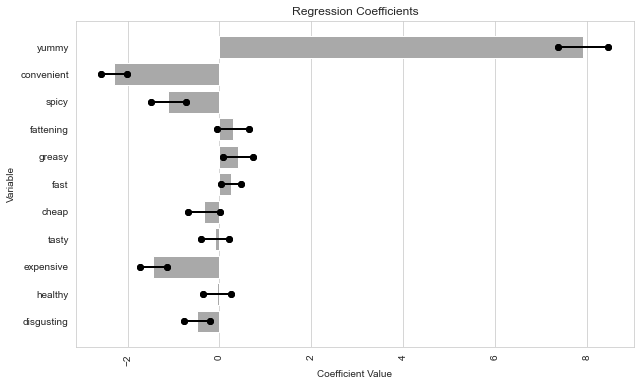

In [111]:

# Define the variable names
variables = ['yummy','convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting']

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x=coef_segment1, y=variables, ax=ax, color='lightgrey')
sns.barplot(x=coef_segment2, y=variables, ax=ax, color='darkgrey')

# Customize the plot
ax.set_xlabel('Coefficient Value')
ax.set_ylabel('Variable')
ax.set_title('Regression Coefficients')
plt.xticks(rotation=90)

# Add confidence intervals
for i, (low, high) in enumerate(zip(ci_low_segment1, ci_high_segment1)):
    ax.plot([low, high], [i, i], marker='o', color='black', linewidth=2)
for i, (low, high) in enumerate(zip(ci_low_segment2, ci_high_segment2)):
    ax.plot([low, high], [i, i], marker='o', color='black', linewidth=2)

# Show the plot
plt.show()


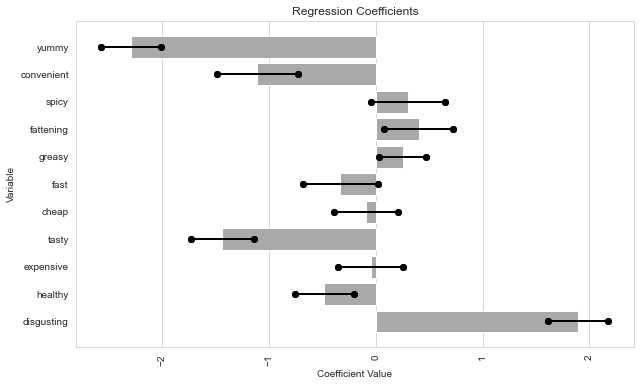

In [120]:

# Define the variable names
variables = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting']

# Segment 1 regression
independent_vars_segment1 = df[['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting']]
dependent_var_segment1 = df['Like.n']
independent_vars_segment1 = sm.add_constant(independent_vars_segment1)  # Add constant term

model_segment1 = sm.OLS(dependent_var_segment1, independent_vars_segment1)
results1 = model_segment1.fit()

# Segment 2 regression
independent_vars_segment2 = df[['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting']]
dependent_var_segment2 = df['Like.n']
independent_vars_segment2 = sm.add_constant(independent_vars_segment2)  # Add constant term

model_segment2 = sm.OLS(dependent_var_segment2, independent_vars_segment2)
results2 = model_segment2.fit()

# Get the regression coefficients and confidence intervals for segment 1
coef_segment1 = results1.params.values[1:]  # Exclude the intercept
ci_low_segment1, ci_high_segment1 = results1.conf_int().values[1:].T

# Get the regression coefficients and confidence intervals for segment 2
coef_segment2 = results2.params.values[1:]  # Exclude the intercept
ci_low_segment2, ci_high_segment2 = results2.conf_int().values[1:].T

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x=coef_segment1, y=variables, ax=ax, color='lightgrey')
sns.barplot(x=coef_segment2, y=variables, ax=ax, color='darkgrey')

# Customize the plot
ax.set_xlabel('Coefficient Value')
ax.set_ylabel('Variable')
ax.set_title('Regression Coefficients')
plt.xticks(rotation=90)

# Add confidence intervals
for i, (low, high) in enumerate(zip(ci_low_segment1, ci_high_segment1)):
    ax.plot([low, high], [i, i], marker='o', color='black', linewidth=2)
for i, (low, high) in enumerate(zip(ci_low_segment2, ci_high_segment2)):
    ax.plot([low, high], [i, i], marker='o', color='black', linewidth=2)

# Show the plot
plt.show()


* To create a segment profile plot for the four-segment k-means solution, a hierarchical cluster analysis is performed on the attributes to identify the most similar ones. The resulting plot positions similar attributes close to each other, making it easier to interpret the key characteristics of each market segment and highlight differences between them. This helps managers understand the distinct perceptions and preferences of each segment in a clear and visually appealing manner.

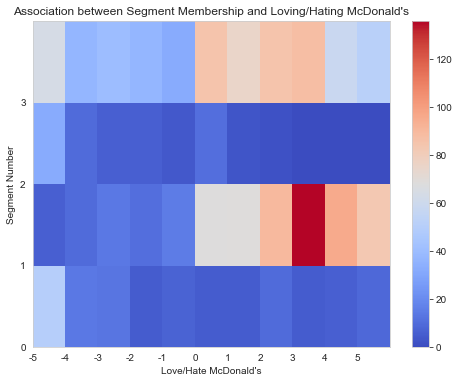

In [156]:
import pandas as pd
import matplotlib.pyplot as plt

# Extract segment membership for each consumer
segment_membership = MD_m4a_labels

# Create a cross-tabulation table
cross_tab = pd.crosstab(segment_membership, df['Like'])

# Generate the mosaic plot
plt.figure(figsize=(8, 6))
plt.pcolor(cross_tab, cmap='coolwarm')
plt.colorbar()
plt.xticks(range(len(cross_tab.columns)), cross_tab.columns)
plt.yticks(range(len(cross_tab.index)), cross_tab.index)
plt.xlabel('Love/Hate McDonald\'s')
plt.ylabel('Segment Number')
plt.title('Association between Segment Membership and Loving/Hating McDonald\'s')

# Show the plot
plt.show()


* Segment 1: Members of this segment rarely express love for McDonald's, as indicated by the blue-colored boxes in the bottom right of the mosaic plot. They also have a higher likelihood of hating McDonald's.

* Segment 4: Members of this segment are significantly more likely to love McDonald's, as indicated by the dark RED boxes in the  right of the mosaic plot. They have a lower likelihood of hating McDonald's, as indicated by the very small blue boxes at the left of the plot.

* Segment 2: Members of this segment have the strongest negative feelings towards McDonald's. Their likelihood of hating McDonald's is extremely high, as shown by the dark RED boxes at the MID-LEFT.

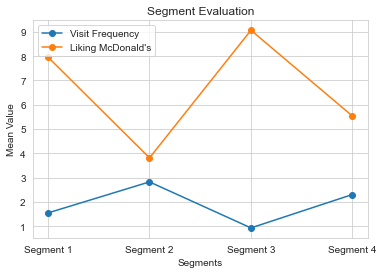

In [164]:

# Calculate mean visit frequency for each segment
visit = df.groupby(MD_m4a_labels)['VisitFrequency'].mean()

# Calculate mean liking McDonald's for each segment
like = df.groupby(MD_m4a_labels)['Like.n'].mean()

# Plot the segment evaluation
segments = ['Segment 1', 'Segment 2', 'Segment 3', 'Segment 4']
x = range(len(segments))

plt.plot(x, visit, marker='o', label='Visit Frequency')
plt.plot(x, like, marker='o', label='Liking McDonald\'s')


plt.xlabel('Segments')
plt.ylabel('Mean Value')
plt.title('Segment Evaluation')
plt.xticks(x, segments)
plt.legend()
plt.grid(True)

plt.show()


* 
Market Segment 2 is unattractive as its members dislike McDonald's and rarely visit. Market Segment 1 shows potential with mixed perceptions but a liking for McDonald's. Targeted marketing can address negative perceptions and broaden McDonald's customer base. The segment evaluation plot helps guide decision-making on the focus of attention for future actions.

#### Step 9 : Customising the Marketing Mix


* 
McDonald's could focus on Segment 3 by offering a MCSUPERBUDGET line tailored to their price expectations. This approach aims to cultivate loyalty, with the expectation that as customers' income increases, they will transition to the regular product range. Product features of the MCSUPERBUDGET line would be distinct, and targeted communication channels would be identified for promotion. Distribution would remain within McDonald's outlets, but considerations may include a dedicated lane to minimize cannibalization.

#### Classification (Optional)

In [166]:
from sklearn.model_selection import train_test_split

x =  df.drop(['Cluster','Like.n'],axis=1)
y = df['Cluster']

In [169]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)
x_train.shape,y_train.shape

((1162, 15), (1162,))

In [178]:
from sklearn.metrics import accuracy_score

model = LogisticRegression()
# Train the model
model.fit(x_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


In [179]:
## performmance of the model
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay

print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       264
           1       1.00      1.00      1.00        27

    accuracy                           1.00       291
   macro avg       1.00      1.00      1.00       291
weighted avg       1.00      1.00      1.00       291



* After implementing the market segmentation strategy, continuous evaluation and monitoring are essential to assess its success and adapt to changing market dynamics. This includes monitoring changes within existing segments, as well as keeping an eye on external factors such as new competitors or shifts in customer preferences, to ensure timely adjustments to the marketing approach.

# **End of Analysis**